# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [45]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'figure', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

In [46]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [47]:
(list(data.columns)), data.shape

(['id',
  'Place Name',
  'Rating',
  'Checkins',
  'Users',
  'Visits',
  'Pricing',
  'Type',
  'Category',
  'Class',
  'geometry'],
 (106287, 11))

In [48]:
data.head(1)

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,geometry
0,50ad0afce4b0b4a7430e2268,Terry's Wine Shop,8.8,294,217,337,None,Wine Shop,Consumption,Optional,POINT (-74.00034036700906 40.73518392010902)


In [49]:
list(data.columns)[-4:-1]

['Type', 'Category', 'Class']

In [50]:
X_dummies = data[list(data.columns)[-4:-1]]
print(X_dummies.shape)
X_dummies = pd.get_dummies(X_dummies)
Fq_dummies = pd.concat([data, X_dummies], axis=1, join='inner')  
Fq_dummies.shape

(106287, 3)


(106287, 716)

# Census Tract shapefile
- imports the Census Tract shapefile


In [51]:
# create the directory for shapefiles and set the environmental variable to it

#masterdata = os.getenv("Master")
#if masterdata is None:
#    os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#    masterdata = os.getenv("Master")
#    print("Warning: Master environmental variable not found and set by code, please review!")
#print("Master: {}".format(masterdata))

In [52]:
# create the directory for shapefiles and set the environmental variable to it

# masterdata = os.getenv("Master")
# if masterdata is None:
#     os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#     masterdata = os.getenv("Master")
#     print("Warning: Master environmental variable not found and set by code, please review!")
# print("Master: {}".format(masterdata))
# def getGeoDataFrameFromShpFileZipUrl(url):
#     '''
#     This function downloads the zip file, unzips it into the dorectory 
#     pointed to by PUIdata environment variable. Then it 
#     reads it into a gepandas dataframe
#     '''
    
#     folderName = 'shape'+ \
#         str(len(os.listdir(os.getenv('TaxiData')))+1)
#     os.makedirs(os.getenv('Master') + '/' + folderName)
#     urlretrieve(url, "region.zip")
#     os.system('unzip -d $Master'+'/'+folderName+' region.zip')
#     filenames = [f for f in os.listdir(os.getenv('Master') + '/' + folderName) if f.endswith('.shp') ]
#     shapeFile = filenames[0]
#     shapeFilePath = os.getenv('Master') + '/' + folderName + '/' + shapeFile
#     return gpd.GeoDataFrame.from_file(shapeFilePath)


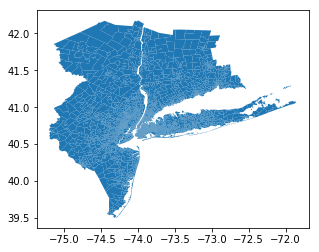

In [53]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [54]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [55]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

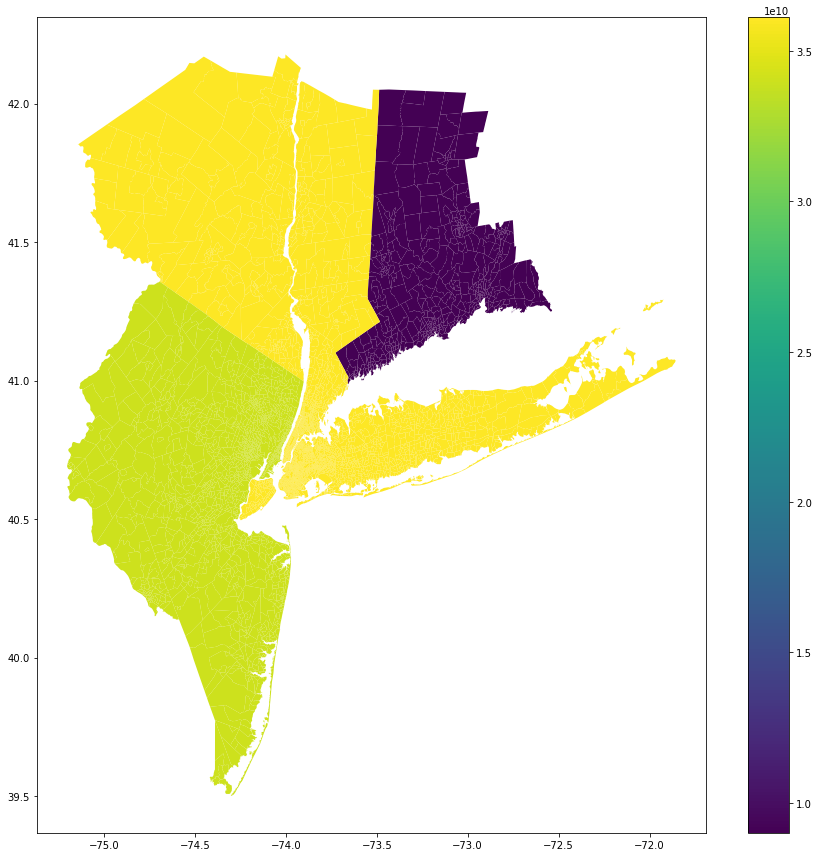

In [56]:
figure, ax = plt.subplots(figsize=(15, 15))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

# Typologies
- import Typologies
- merges topologies
- map topologies

In [157]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
Typologiesgdp.columns

Index(['geoid', 'typology_old', 'medrent90', 'medrent00', 'medrent16',
       'medhval90', 'medhval00', 'medhval16', 'percol90', 'percol00',
       'percol16', 'pernwh90', 'pernwh00', 'pernwh16', 'perli90', 'perli00',
       'perli16', 'per_rent_90', 'per_rent_00', 'per_rent16', 'pop00', 'pop16',
       'asian_16_low', 'carcommuters_00', 'pre50_16', 'hhwch16', 'empd15',
       'density16', 'aland', 'li16', 'afford90', 'belowmedcol90',
       'abovemednwh', 'abovemedli', 'abovemedrent', 'vulnrisk90', 'vuln90',
       'afford00', 'belowmedcol00', 'abovemednwh00', 'abovemedli00',
       'abovemedrent00', 'vulnrisk00', 'vuln00', 'afford16', 'belowmedcol16',
       'abovemednwh16', 'abovemedli16', 'abovemedrent16', 'vulnrisk16',
       'vuln16', 'hotmarket90(127%-169%)', 'hotmarket00(110%-207%)',
       'percol16.1', 'edudiff0016', 'abm_dif_0016', 'edudiff9000',
       'abm_dif_9000', 'hinc90_NYU', 'hinc00_NYU', 'hinc16_NYU', 'hinc90',
       'hinc00', 'hinc16', 'pct_ch_hinc90_00', 'pct_ch_

In [158]:
list(Typologiesgdp.columns)

['geoid',
 'typology_old',
 'medrent90',
 'medrent00',
 'medrent16',
 'medhval90',
 'medhval00',
 'medhval16',
 'percol90',
 'percol00',
 'percol16',
 'pernwh90',
 'pernwh00',
 'pernwh16',
 'perli90',
 'perli00',
 'perli16',
 'per_rent_90',
 'per_rent_00',
 'per_rent16',
 'pop00',
 'pop16',
 'asian_16_low',
 'carcommuters_00',
 'pre50_16',
 'hhwch16',
 'empd15',
 'density16',
 'aland',
 'li16',
 'afford90',
 'belowmedcol90',
 'abovemednwh',
 'abovemedli',
 'abovemedrent',
 'vulnrisk90',
 'vuln90',
 'afford00',
 'belowmedcol00',
 'abovemednwh00',
 'abovemedli00',
 'abovemedrent00',
 'vulnrisk00',
 'vuln00',
 'afford16',
 'belowmedcol16',
 'abovemednwh16',
 'abovemedli16',
 'abovemedrent16',
 'vulnrisk16',
 'vuln16',
 'hotmarket90(127%-169%)',
 'hotmarket00(110%-207%)',
 'percol16.1',
 'edudiff0016',
 'abm_dif_0016',
 'edudiff9000',
 'abm_dif_9000',
 'hinc90_NYU',
 'hinc00_NYU',
 'hinc16_NYU',
 'hinc90',
 'hinc00',
 'hinc16',
 'pct_ch_hinc90_00',
 'pct_ch_hinc00_16',
 'abm_inc_90_00',
 '

In [58]:
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [59]:
Typologiesgdp['Type_binary'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Type_binary'].replace('VHI - Super Gentrification or Exclusion',1,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Type_binary'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Type_binary'].replace(nan,0,inplace=True)


0.0    0.818988
1.0    0.181012
Name: Type_binary, dtype: float64

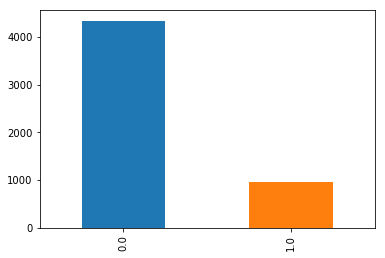

In [60]:
Typologiesgdp['Type_binary'].unique()
Typologiesgdp['Type_binary'].value_counts().plot(kind='bar')
Typologiesgdp['Type_binary'].value_counts()/Typologiesgdp['Type_binary'].value_counts().sum()

In [61]:
Typologiesgdp['Type_binary'].value_counts().sum()

5298

In [62]:
Typologiesgdp['Type_1.19'] = Typologiesgdp['Type_binary'].copy()

In [63]:
# Typologiesgdp.to_csv('typologies_binary.csv')
Typologiesgdp.drop(columns='Type_binary', inplace=True)

In [64]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
print(type(Typologiesgdp.iloc[:,0][0]))
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,typology_old,medrent90,medrent00,medrent16,medhval90,medhval00,medhval16,percol90,percol00,...,ch_all_li_count90_00,ch_all_li_count00_16,liloss9016,per_limove16,per_limove09,exclusion,popgrowth0016,Incch0016,li_hh_16,Typology_final_1.19.19
0,9.001010e+09,MHI - At Risk of Exclusion,1001.000000,1601.0,1510.0,500001.0000,1000001.0,1494000.0,0.516292,0.354071,...,-19.55026245,136.0813599,0,0.6400990486,0.3994323015,0,0.0,0.5498838311,401.65921,LI - At Risk of Gentrification
1,9.001010e+09,MHI - Advanced Exclusion,1000.999968,1244.0,1628.0,500001.0059,1000000.0,2000000.0,0.619490,0.748477,...,48.47680664,-7.125137329,0,0.4056389332,0.5011153221,1,0.0,0.8620689655,213.51843,LI - At Risk of Gentrification
2,9.001010e+09,MHI - Advanced Exclusion,1000.999996,833.0,2113.0,499472.1825,1000000.0,2000000.0,0.602177,0.704225,...,-13.43575287,85.95057678,0,0.4642397463,0.3962181509,0,0.0,0.7325793103,180.98723,LI - At Risk of Gentrification
3,9.001010e+09,MHI - Displacement of LI hh - Ongoing Exclusion,1001.000000,1791.0,2250.0,500001.0000,769300.0,1459900.0,0.552381,0.342164,...,38.88369751,-84.88815308,0,0.3480436504,0.4504249096,1,1.0,1.192524372,363.08643,LI - At Risk of Gentrification
4,9.001010e+09,MHI - At Risk of Exclusion,1001.000000,1967.0,1900.0,500001.0000,1000001.0,2000001.0,0.647751,0.357744,...,-19.13200378,58.64305115,0,0.3950261176,0.4935227931,1,0.0,0.8974181129,310.05765,LI - At Risk of Gentrification


In [65]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail()

,GEOID,geometry,typology_old,medrent90,medrent00,medrent16,medhval90,medhval00,medhval16,percol90,...,ch_all_li_count90_00,ch_all_li_count00_16,liloss9016,per_limove16,per_limove09,exclusion,popgrowth0016,Incch0016,li_hh_16,Typology_final_1.19.19
5285,36061021703,POLYGON ((-73.94607800039937 40.82126399983373...,Missing Data,324.000003,533.000005,0.0,0.0000,0.0000,0.0,0.000095,...,0.2853928208,-0.2856110036,0,0.6940270066,0.0005622510216,0,1.0,NaN,0.00000,MHI - Stable Exclusion
5286,36061021800,POLYGON ((-73.94872800029694 40.80333100022552...,LI - Ongoing Gentrification,283.000000,461.000000,1184.0,NaN,392300.0000,NaN,0.075093,...,60.11474609,268.1595459,0,0.496555984,0.65008986,1,1.0,1.501362508,1671.15310,MHI - Stable Exclusion
5287,36061021900,"POLYGON ((-73.9554510000636 40.81937700004859,...",LI - Not Losing Low-Income Households,310.999994,427.000000,528.0,0.0000,625000.0000,0.0,0.055690,...,514.1179199,-57.55786133,0,0.719860971,0.5384375453,0,0.0,0.8618693201,1742.72380,MHI - Stable Exclusion
5288,36061022102,POLYGON ((-73.94515500010318 40.82087599992749...,LI - Ongoing Displacement of Low- Income House...,329.000000,582.000000,1196.0,187500.0000,175000.0000,537900.0,0.161512,...,194.1737671,22.30535889,0,0.7885694504,0.5269782543,0,1.0,0.9512603314,662.92755,MHI - Stable Exclusion
5289,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",MHI - At Risk of Exclusion,554.271997,774.956522,1532.0,300142.2554,361840.6072,1146400.0,1.036555,...,-76.31544495,30.12321472,0,0.6077033281,0.7516720891,1,1.0,1.007667239,284.00000,MHI - Stable Exclusion


In [66]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5290, 83)


(5290, 83)

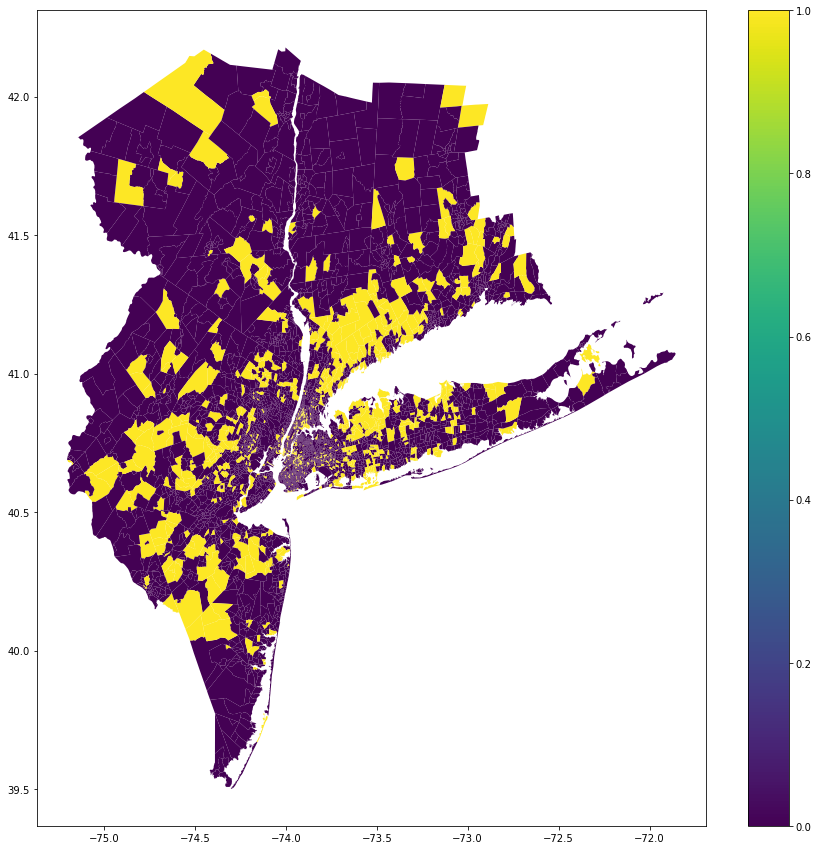

In [67]:
figure, ax = plt.subplots(figsize=(15, 15))
mergedgpd.plot(column='Type_1.19',legend = True, ax=ax)

In [ ]:
for column in Typologiesgdp.columns:
    if 

In [68]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','hinc00','hinc16','pct_ch_hinc00_16']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()


<class 'numpy.float64'>


,GEOID,hinc00,hinc16,pct_ch_hinc00_16
0,9.001010e+09,273976.05,150655.0,-0.450116
1,9.001010e+09,290000.00,250000.0,-0.137931
2,9.001010e+09,290000.00,212448.0,-0.267421
3,9.001010e+09,157543.95,187875.0,0.192524
4,9.001010e+09,246540.60,221250.0,-0.102582


In [ ]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
list(merged.columns)
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

In [ ]:
# mergedgpd

In [ ]:
mergedgpd.pct_ch_hinc00_16.std()

In [ ]:
figure, ax = plt.subplots(figsize=(15, 15))
mergedgpd[mergedgpd.pct_ch_hinc00_16>mergedgpd.pct_ch_hinc00_16.std()].plot(column='pct_ch_hinc00_16',legend = True, ax=ax)


In [ ]:
# Explore pct_ch_hinc00_16
mergedgpd.pct_ch_hinc00_16.hist(bins = 10, figsize = (5,5))

In [ ]:
# print(mergedgpd.hinc16.describe())
print(mergedgpd.pct_ch_hinc00_16.isnull().sum())
mergedgpd.pct_ch_hinc00_16.describe()


In [ ]:
# Check calculation
mergedgpd['check_00_16'] = (mergedgpd.hinc16-mergedgpd.hinc00)/mergedgpd.hinc00
cols_typ = ['GEOID','geometry','pct_ch_hinc00_16']
mergedgpd = mergedgpd.loc[:,cols_typ]
print(mergedgpd.shape)


In [ ]:
mergedgpd.pct_ch_hinc00_16= mergedgpd.pct_ch_hinc00_16.replace(nan,mergedgpd.pct_ch_hinc00_16.mean())

mergedgpd =mergedgpd.dropna(how='all',axis=0)
print(mergedgpd.shape)
mergedgpd = mergedgpd.dropna(axis=0)
print(mergedgpd.shape)
cols_X = [i for i in mergedgpd.columns] #if (i != 'pct_ch_hinc00_16')&(i != 'GEOID')]
print(cols_X)

In [ ]:
# # Explore this typology
# X = mergedgpd.pct_ch_hinc00_16
# X = np.asarray(X)
# X.shape
# X = X.reshape((len(X), 1))

# X.shape
# for i in numpy.arange(-1, 3, 0.5):
#     print(i)
#     print(mergedgpd.pct_ch_hinc00_16[(mergedgpd.pct_ch_hinc00_16< (i+0.5)) & (mergedgpd.pct_ch_hinc00_16>i)].describe())

In [ ]:
mergedgpd['pct_ch_hinc00_16_binary'] = (mergedgpd.pct_ch_hinc00_16> mergedgpd.pct_ch_hinc00_16.std())
(mergedgpd.pct_ch_hinc00_16_binary> mergedgpd.pct_ch_hinc00_16_binary.std()).sum()

In [ ]:
(mergedgpd.pct_ch_hinc00_16_binary> mergedgpd.pct_ch_hinc00_16_binary.std()).sum()/len(mergedgpd)

In [ ]:
mergedgpd['pct_ch_hinc00_16_binary'].value_counts().plot(kind='bar')

In [ ]:
cols = ['pct_ch_hinc00_16_binary','GEOID']
mergedgpd = mergedgpd.loc[:,cols]
mergedgpd.pct_ch_hinc00_16_binary.replace(False,0, inplace=True)
mergedgpd.pct_ch_hinc00_16_binary.replace(True,1, inplace=True)
mergedgpd.pct_ch_hinc00_16_binary  = pd.to_numeric(mergedgpd.pct_ch_hinc00_16_binary)

In [ ]:
mergedgpd.to_csv('pct_ch_hinc00_16_0_15.csv')

In [ ]:
mergedgpd

# Spatail Join
- Spatail join by Census Tract
- map Businesses


In [81]:
mergedgpd.crs, data.crs, mergedgpd.shape, data.shape

(None, {'init': 'epsg:4326'}, (5290, 4), (106287, 11))

In [82]:
mergedgpd.crs = {'init' :'epsg:4326'}

In [83]:
mergedgpd.crs

{'init': 'epsg:4326'}

In [84]:
data_sjoined = gpd.sjoin(mergedgpd.drop(columns='pct_ch_hinc00_16_0_15'),Fq_dummies, op="contains")

In [85]:
list(data_sjoined.columns)

['GEOID',
 'geometry',
 'pct_ch_hinc00_16',
 'index_right',
 'id',
 'Place Name',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Pricing',
 'Type',
 'Category',
 'Class',
 'Type_ATM',
 'Type_Accessories Store',
 'Type_Acupuncturist',
 'Type_Adult Boutique',
 'Type_Adult Education Center',
 'Type_Advertising Agency',
 'Type_Afghan Restaurant',
 'Type_African Restaurant',
 'Type_Airport',
 'Type_Airport Food Court',
 'Type_Airport Gate',
 'Type_Airport Lounge',
 'Type_Airport Service',
 'Type_Airport Terminal',
 'Type_Airport Tram',
 'Type_Alternative Healer',
 'Type_American Restaurant',
 'Type_Amphitheater',
 'Type_Animal Shelter',
 'Type_Antique Shop',
 'Type_Apres Ski Bar',
 'Type_Aquarium',
 'Type_Arcade',
 'Type_Arepa Restaurant',
 'Type_Argentinian Restaurant',
 'Type_Art Gallery',
 'Type_Art Museum',
 'Type_Art Studio',
 'Type_Arts & Crafts Store',
 'Type_Arts & Entertainment',
 'Type_Asian Restaurant',
 'Type_Assisted Living',
 'Type_Astrologer',
 'Type_Athletics & Sports',
 'Ty

In [86]:
data_sjoined_sum = data_sjoined.groupby(by='GEOID').sum()
print(data_sjoined_sum.shape,data_sjoined_sum.columns)
data_sjoined_sum_merged = data_sjoined_sum.merge(mergedgpd.loc[:,['GEOID','pct_ch_hinc00_16_0_15', 'geometry']],on='GEOID')
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)
data_sjoined_sum_merged = gpd.GeoDataFrame(data_sjoined_sum_merged)
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)

(3009, 711) Index(['pct_ch_hinc00_16', 'index_right', 'Rating', 'Checkins', 'Users',
       'Visits', 'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=711)
(3009, 714) Index(['GEOID', 'pct_ch_hinc00_16', 'index_right', 'Rating', 'Checkins',
       'Users', 'Visits', 'Type_ATM', 'Type_Accessories Store',
       'Type_Acupuncturist',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'pct_ch_hinc00_16_0_15', 'geometry'],
      dtype='object', length=714)
(3009, 714) Index(['GEOID', 'pct_ch_hinc00_16', 'index_right', 'Rating', 'Checkins',
       'Users', '

In [87]:
Fq_dummies.shape,data_sjoined_sum.shape, len(data_sjoined_sum_merged.GEOID.unique())

((106287, 716), (3009, 711), 3009)

In [88]:
data_sjoined_sum_merged.columns
data_sjoined_sum_merged.drop(columns= 'index_right',inplace=True)

In [89]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'pct_ch_hinc00_16_0_15', 'geometry'],
      dtype='object', length=713)

In [90]:
data_sjoined_sum_merged.rename(columns={"pct_ch_hinc00_16_0_15": "Typologies"}, inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


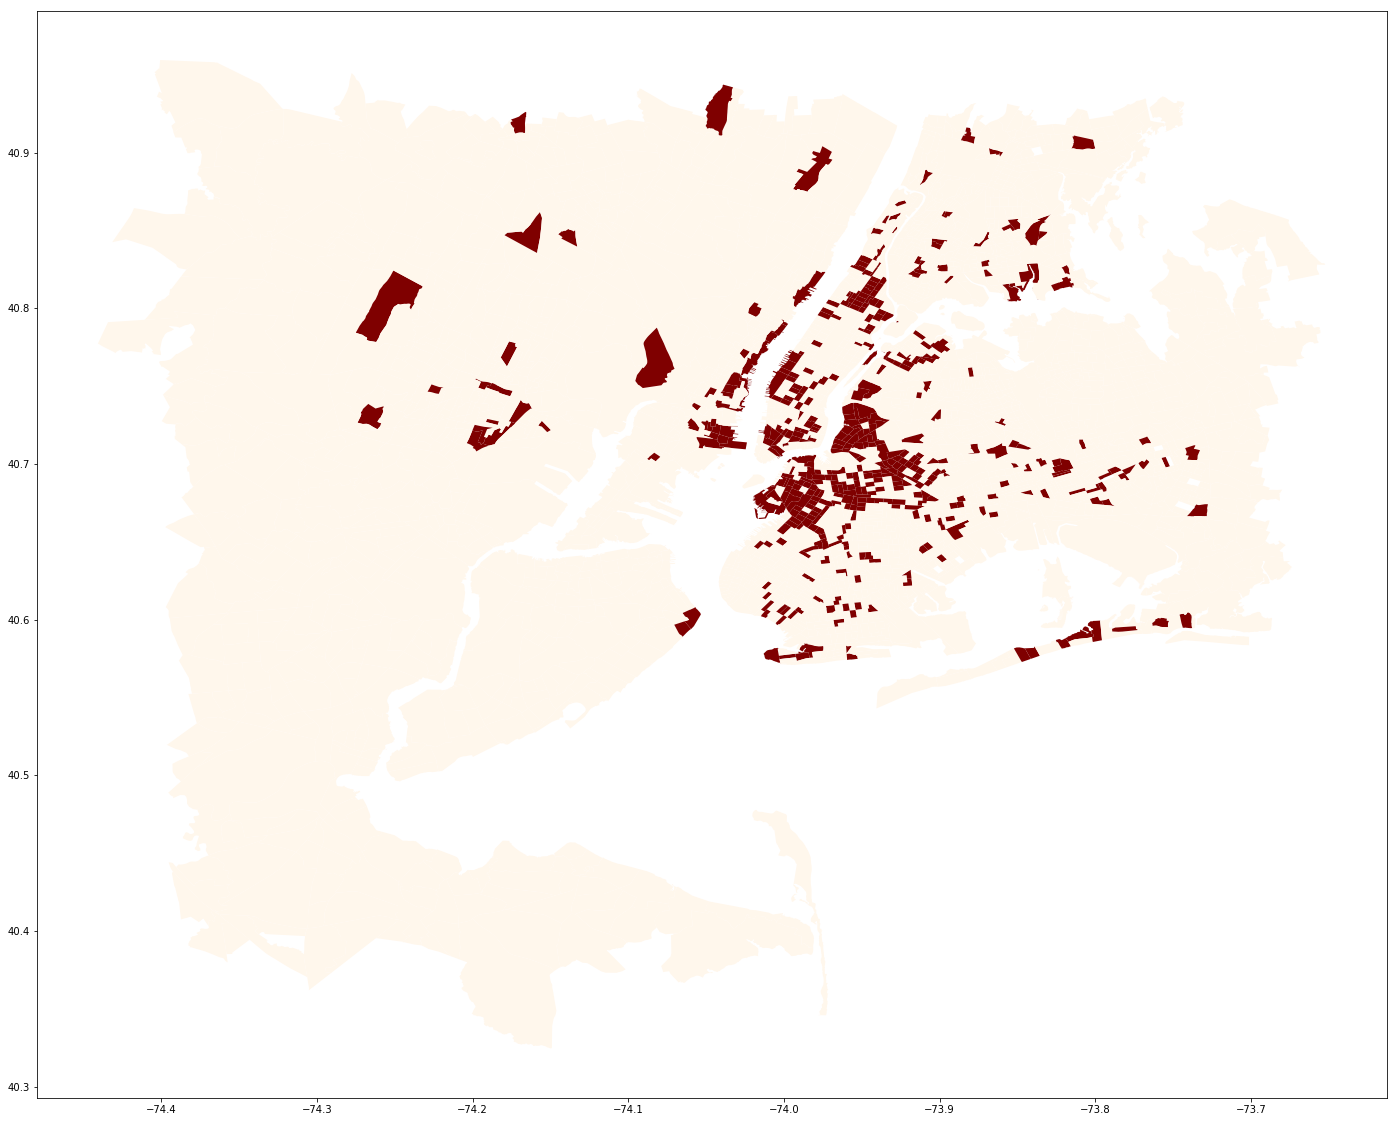

In [91]:
plt.rcParams['figure.figsize'] = (30, 20)
ax = data_sjoined_sum_merged.plot(column='Typologies', scheme='quantiles', cmap='OrRd')
ax.legend()

In [92]:
# data_sjoined_sum_merged.iloc[:,:6]

In [93]:
# sfig = pd.scatter_matrix(data_sjoined_sum_merged.iloc[:,:6], s=30, figsize=(10, 10), diagonal='kde')

In [94]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=713)

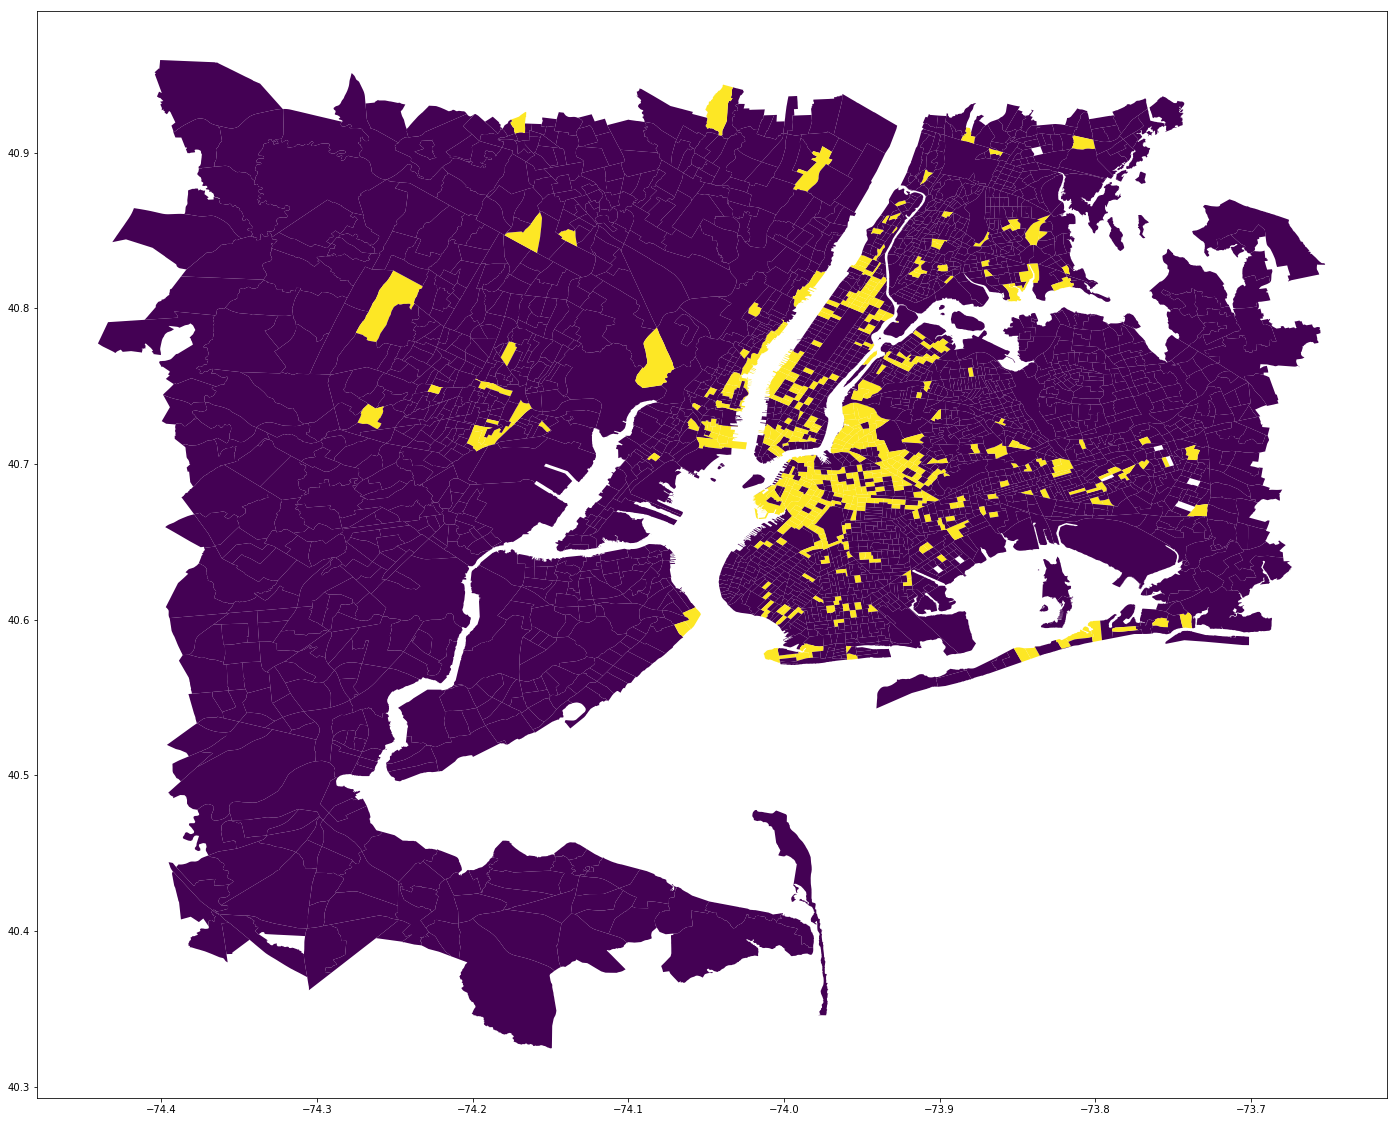

In [95]:
data_sjoined_sum_merged.plot(column='Typologies')

In [96]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=713)

# Part II. Modeling
### Analysis ## FOURSQUARE ONLY

In [97]:
# Neighbours
X_foursquare_neighbours = pd.read_csv('Improve_Features/X_foursquare-neighbours.csv')
print(X_foursquare_neighbours.shape,X_foursquare_neighbours.columns)
X_foursquare_neighbours.drop(['Unnamed: 0'],axis =1, inplace=True)
cols_neighbours = []
for column in X_foursquare_neighbours.columns:
    if '_sum10' in column:
        cols_neighbours.append(column)
cols_neighbours = cols_neighbours + ['GEOID']

(3009, 2130) Index(['Unnamed: 0', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown_sum5', 'Category_Unknown_sum10', 'Class__sum5',
       'Class__sum10', 'Class_Necessary_sum5', 'Class_Necessary_sum10',
       'Class_Optional_sum5', 'Class_Optional_sum10', 'GEOID', 'geometry'],
      dtype='object', length=2130)


In [98]:
# Distances
X_foursquare_high = pd.read_csv('Improve_Features/X_foursquare-distances_high.csv')

print(X_foursquare_high.shape,X_foursquare_high.columns)
cols_high = []
for column in X_foursquare_high.columns:
    if 'distance' in column:
        cols_high.append(column)
cols_high = cols_high + ['GEOID']
cols_high

(3009, 724) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant', 'distance_to_Type_Café',
       'distance_to_Type_Wine Bar', 'distance_to_Type_Cocktail Bar',
       'distance_to_Type_Beer Garden'],
      dtype='object', length=724)


['distance_to_Type_American Restaurant',
 'distance_to_Type_Juice Bar',
 'distance_to_Type_Coffee Shop',
 'distance_to_Type_Deli / Bodega',
 'distance_to_Type_Food Truck',
 'distance_to_Type_Salad Place',
 'distance_to_Type_New American Restaurant',
 'distance_to_Type_Gastropub',
 'distance_to_Type_Steakhouse',
 'distance_to_Type_French Restaurant',
 'distance_to_Type_Café',
 'distance_to_Type_Wine Bar',
 'distance_to_Type_Cocktail Bar',
 'distance_to_Type_Beer Garden',
 'GEOID']

In [99]:
X_foursquare_low = pd.read_csv('Improve_Features/X_foursquare-distances_low.csv')
print(X_foursquare_low.shape,X_foursquare_low.columns)
cols_low = []
for column in X_foursquare_low.columns:
    if 'distance' in column:
        cols_low.append(column)
cols_low = cols_low + ['GEOID']
cols_low

(3009, 720) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Typologies', 'geometry', 'distance_to_Type_Latin American Restaurant',
       'distance_to_Type_Bar', 'distance_to_Type_Donut Shop',
       'distance_to_Type_Taco Place', 'distance_to_Type_Fast Food Restaurant',
       'distance_to_Type_Spanish Restaurant',
       'distance_to_Type_Fried Chicken Joint',
       'distance_to_Type_Caribbean Restaurant'],
      dtype='object', length=720)


['distance_to_Type_Latin American Restaurant',
 'distance_to_Type_Bar',
 'distance_to_Type_Donut Shop',
 'distance_to_Type_Taco Place',
 'distance_to_Type_Fast Food Restaurant',
 'distance_to_Type_Spanish Restaurant',
 'distance_to_Type_Fried Chicken Joint',
 'distance_to_Type_Caribbean Restaurant',
 'GEOID']

In [100]:
# Distances- numeric 
X_foursquare_numeric = pd.read_csv('Improve_Features/X_foursquare-distances_numeric.csv')
print(X_foursquare_numeric.shape,X_foursquare_numeric.columns)
cols_numeric = []
for column in X_foursquare_numeric.columns:
    if 'distance' in column:
        cols_numeric.append(column)
cols_numeric = cols_numeric + ['GEOID']
cols_numeric
# Distances- cats 
X_foursquare_cats1 = pd.read_csv('Improve_Features/X_foursquare-distances_cats.csv')
print(X_foursquare_cats1.shape,X_foursquare_cats1.columns)
cols_cats1 = []
for column in X_foursquare_cats1.columns:
    if 'distance' in column:
        cols_cats1.append(column)
cols_cats1 = cols_cats1 + ['GEOID']
cols_cats1
# Distances- class
X_foursquare_class = pd.read_csv('Improve_Features/X_foursquare-distances_class.csv')
print(X_foursquare_class.shape,X_foursquare_cats1.columns)
cols_class = []
for column in X_foursquare_class.columns:
    if 'distance' in column:
        cols_class.append(column)
cols_class = cols_class + ['GEOID']
cols_class

(3009, 716) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional',
       'Typologies', 'geometry', 'distance_to_Rating', 'distance_to_Checkins',
       'distance_to_Users', 'distance_to_Visits'],
      dtype='object', length=716)
(3009, 723) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Category_Consumption', 'distance_to_Category_Education',
       'distance_to_Category_Income', 'distance_to_Category_Leisure',
       'distance_to_Category_Mobility', 'distance_to_Category_Nutrition',
       'distance_to_Category_Personal care', 'distance_to_Category_Social',
       'distance_to_Category_Taking care', 'dista

['distance_to_Class_',
 'distance_to_Class_Necessary',
 'distance_to_Class_Optional',
 'GEOID']

In [118]:
X_foursquare_neighbours = X_foursquare_neighbours.loc[:,cols_neighbours]
X_foursquare_high = X_foursquare_high.loc[:,cols_high]
X_foursquare_class = X_foursquare_class.loc[:,cols_class]
X_foursquare_cats1 = X_foursquare_cats1.loc[:,cols_cats1]
X_foursquare_numeric = X_foursquare_numeric.loc[:,cols_numeric]
X_foursquare_low = X_foursquare_low.loc[:,cols_low]
# X_foursquare_person = X_foursquare_person.loc[:,cols_person]
# X_foursquare_income = X_foursquare_income.loc[:,cols_income]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [119]:
# X_foursquare = \
#     X_foursquare_neighbours.merge(X_foursquare_high.merge(X_foursquare_low.merge(X_foursquare_person.merge(X_foursquare_income,\
#                                                                         on='GEOID'),on='GEOID'),on='GEOID'), on = 'GEOID')
# print(X_foursquare_low.shape[1]+X_foursquare_high.shape[1]+X_foursquare_neighbours.shape[1])
# print(X_foursquare_low.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape)
X_foursquare = X_foursquare_high.merge(X_foursquare_neighbours, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_low, on='GEOID')

X_foursquare = X_foursquare.merge(X_foursquare_numeric, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_cats1, on='GEOID')
X_foursquare.shape

(3009, 747)

In [120]:
X_foursquare = X_foursquare.merge(data_sjoined_sum_merged, on='GEOID')
X_foursquare['Latitutde'] = data_sjoined_sum_merged.geometry.centroid.x
X_foursquare['Longitude'] = data_sjoined_sum_merged.geometry.centroid.y


In [121]:
print(X_foursquare.shape)
X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(3009, 1461)
(3009, 1461)


In [122]:
### Preprocessing Data
### Preprocessing Data

# X_foursquare = data_sjoined_sum_merged.drop(['Typologies', 'geometry'],axis =1).copy()
y = X_foursquare.Typologies
X_foursquare = X_foursquare.drop(['Typologies','GEOID'],axis =1).copy()
## change to zeros

# replace with mean/median

# create a new

print(X_foursquare.shape)
# X_foursquare.replace(False,0,inplace=True)
# X_foursquare.replace('FALSE',0,inplace=True)
# X_foursquare.replace('#NULL!',0,inplace=True)
# X_foursquare.replace(nan,0,inplace=True)

X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(3009, 1459)
(3009, 1459)


In [123]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_foursquare, y, test_size = 0.3, random_state = 1)    

In [124]:
X_foursquare = X_foursquare.drop(['geometry'],axis =1).copy()

X_foursquare.columns

Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Latitutde', 'Longitude'],
      dtype='object', length=1458)

In [125]:
# Normalize
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

models = ['original','scaled','minmaxed']
Xdata_scaled = preprocessing.scale(X_foursquare)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_foursquare)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['original'] = X_foursquare
dictx['scaled'] = Xdata_scaled
dictx['minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [126]:
model = {}
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}

model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
resultset=data_sjoined_sum_merged.copy()

In [127]:
from sklearn.model_selection import train_test_split

X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(2106, 1458) (903, 1458) (2106,) (903,)
(2106, 1458) (903, 1458) (2106,) (903,)
(2106, 1458) (903, 1458) (2106,) (903,)


# LR

In [128]:
## Logistic Reeg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab

for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]
    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
    resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'minmaxed': {'Logit': 0.45421245421245415},
 'original': {'Logit': 0.092715231788079458},
 'scaled': {'Logit': 0.44108761329305135}}

# DT

In [129]:
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
for m in models:
    #     dictx[m]
    #     model[m]
    param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
    ds=gr.fit(X_train[m],y_train[m])
    print (ds.best_params_)

    print(gr.score(X_test[m],y_test[m]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 4}
0.939091915836


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 4}
0.939091915836


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 4}
0.939091915836


In [130]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
    for c in range(5):

        dt=DecisionTreeClassifier()


        dt = DecisionTreeClassifier(max_depth=ds.best_params_['max_depth'],max_leaf_nodes=ds.best_params_['max_leaf_nodes'])
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))

    print(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
    resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

0.939091915836
0.939091915836
0.939091915836


{'minmaxed': {'DT': 0.78764478764478763, 'Logit': 0.45421245421245415},
 'original': {'DT': 0.78764478764478763, 'Logit': 0.092715231788079458},
 'scaled': {'DT': 0.78764478764478763, 'Logit': 0.44108761329305135}}

In [131]:
print(m)
list(dt.predict(X_test[m]))

minmaxed


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,


In [132]:
resultset=data_sjoined_sum_merged
resultset['predicttyp']=dt.predict(X_foursquare)

In [133]:
resultset['predicttyp2']=gr.predict(X_foursquare)

In [134]:
resultset['actualtyp']=data_sjoined_sum_merged.Typologies

# Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
def featureImportancePlot(rf, labels):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure()
    pl.title("Feature importances")
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


original


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 7, 'max_depth': 8, 'n_estimators': 2}
0.854928017719
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.858250276855


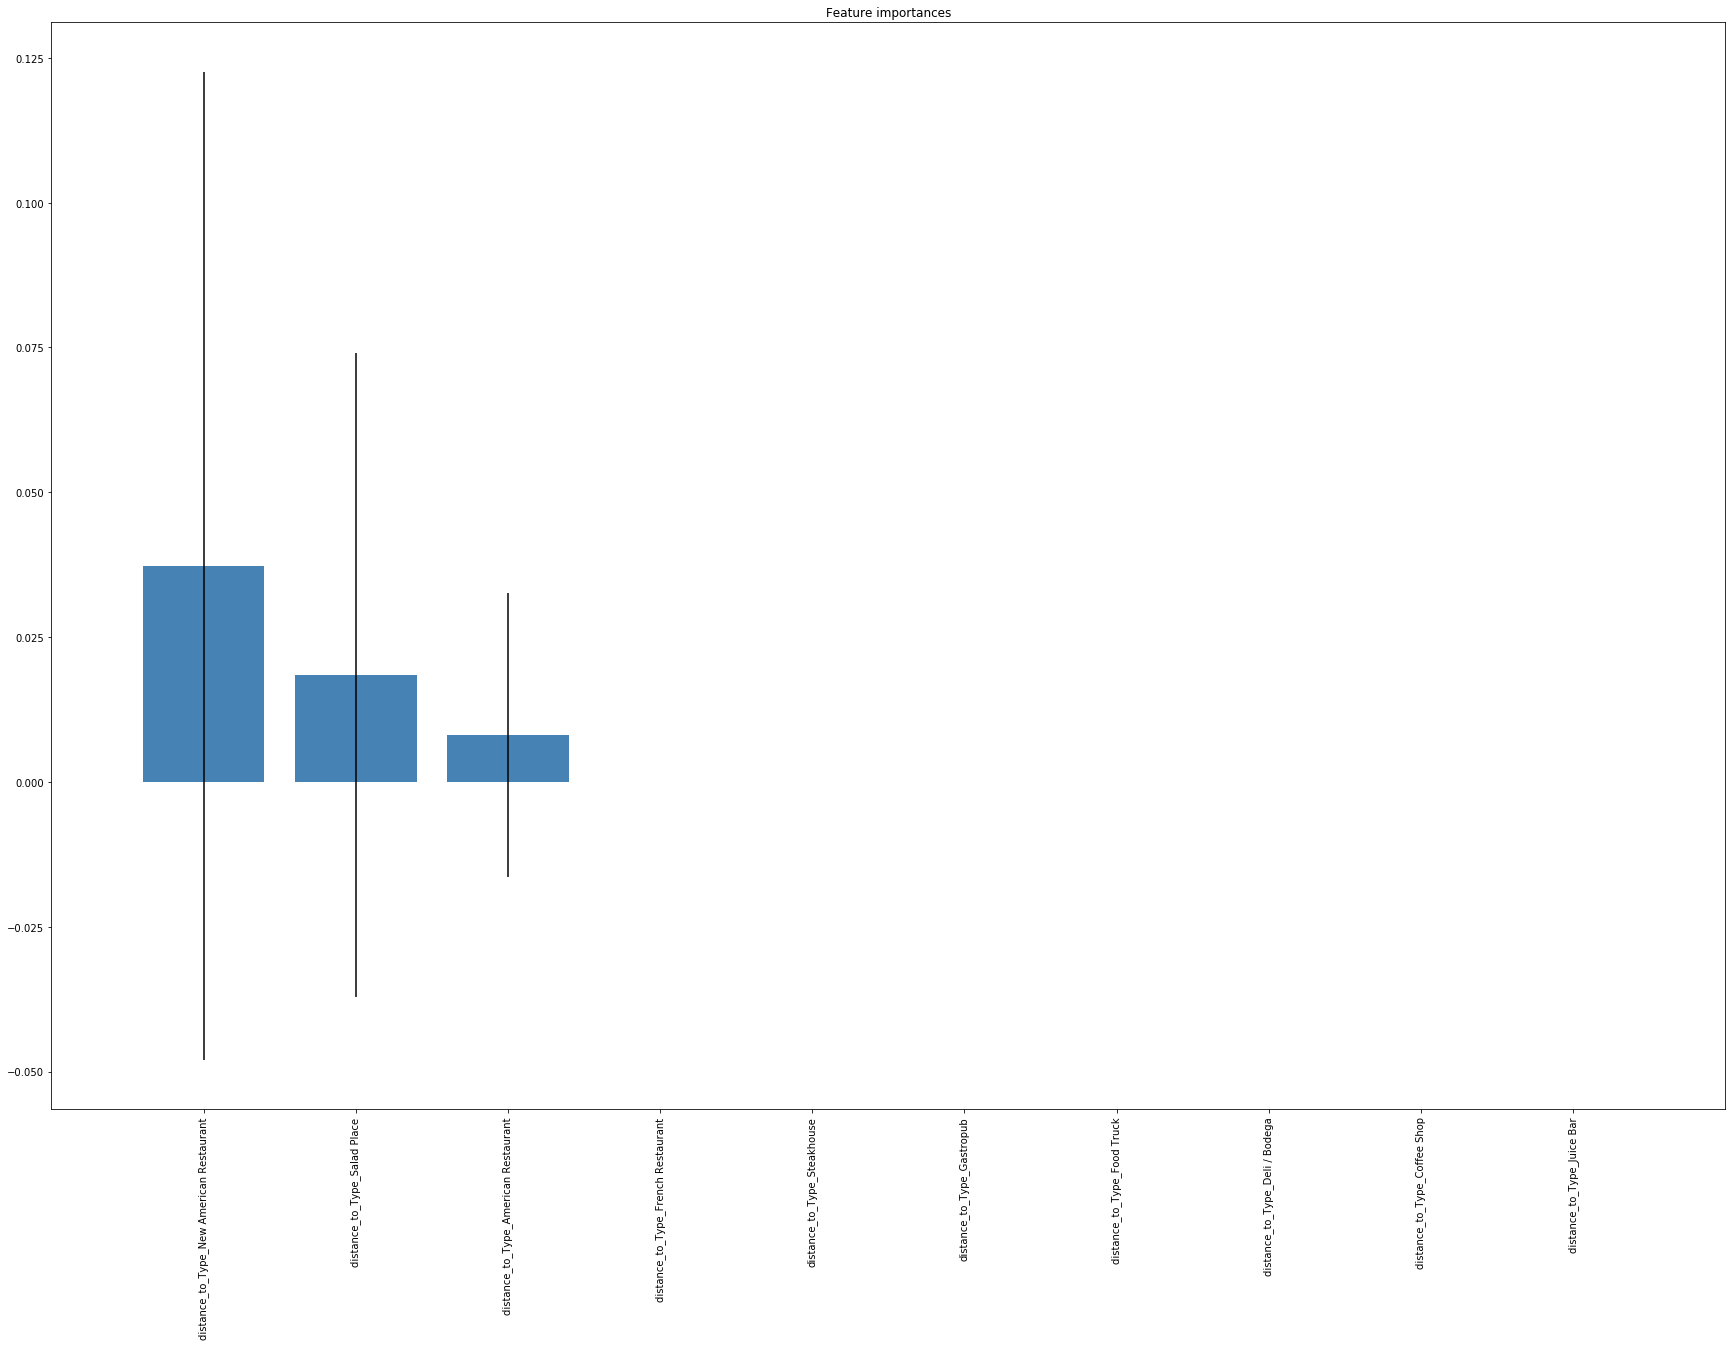

scaled


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'max_depth': 9, 'n_estimators': 3}
0.860465116279
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.888150609081


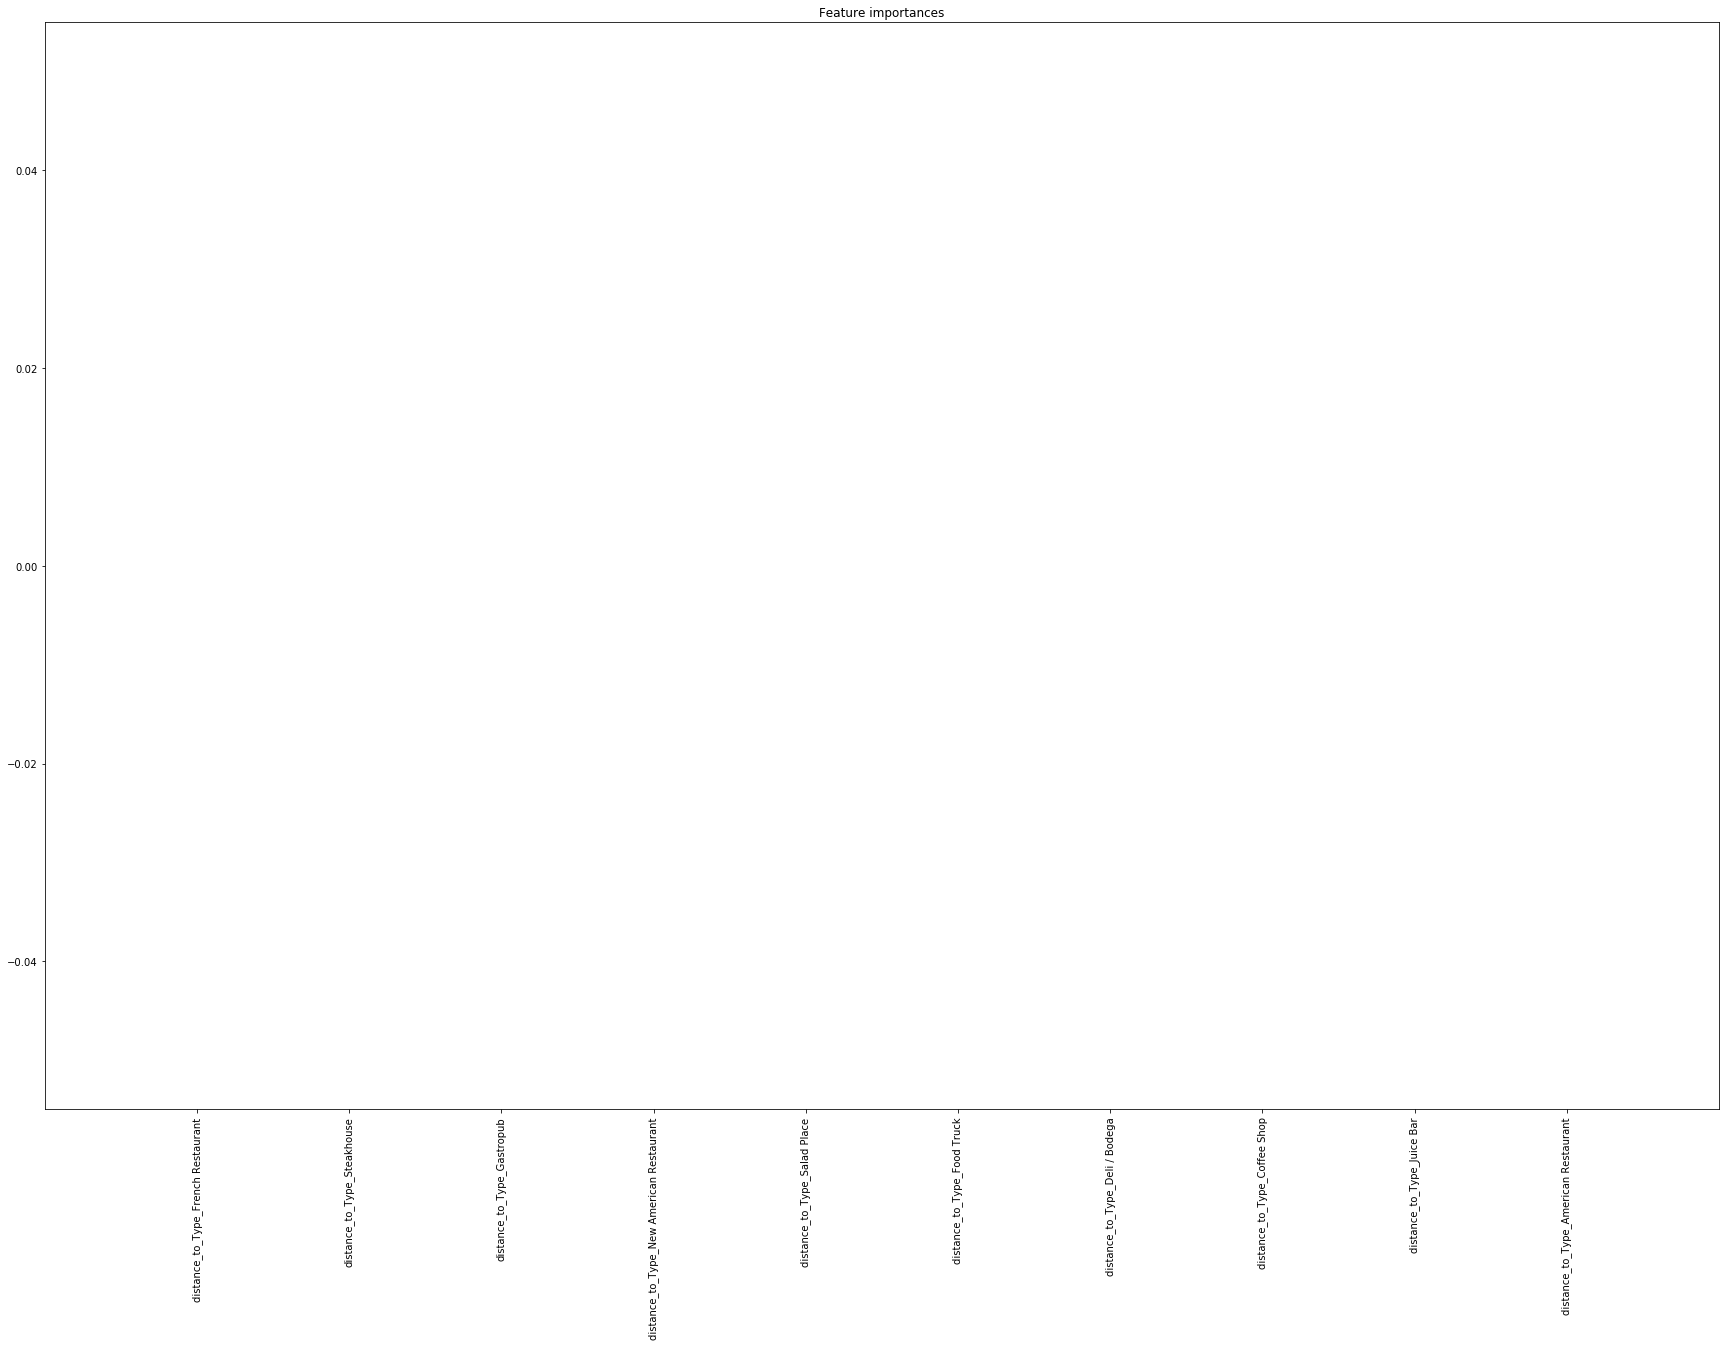

minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 6, 'max_depth': 2, 'n_estimators': 2}
0.862679955703
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.875968992248


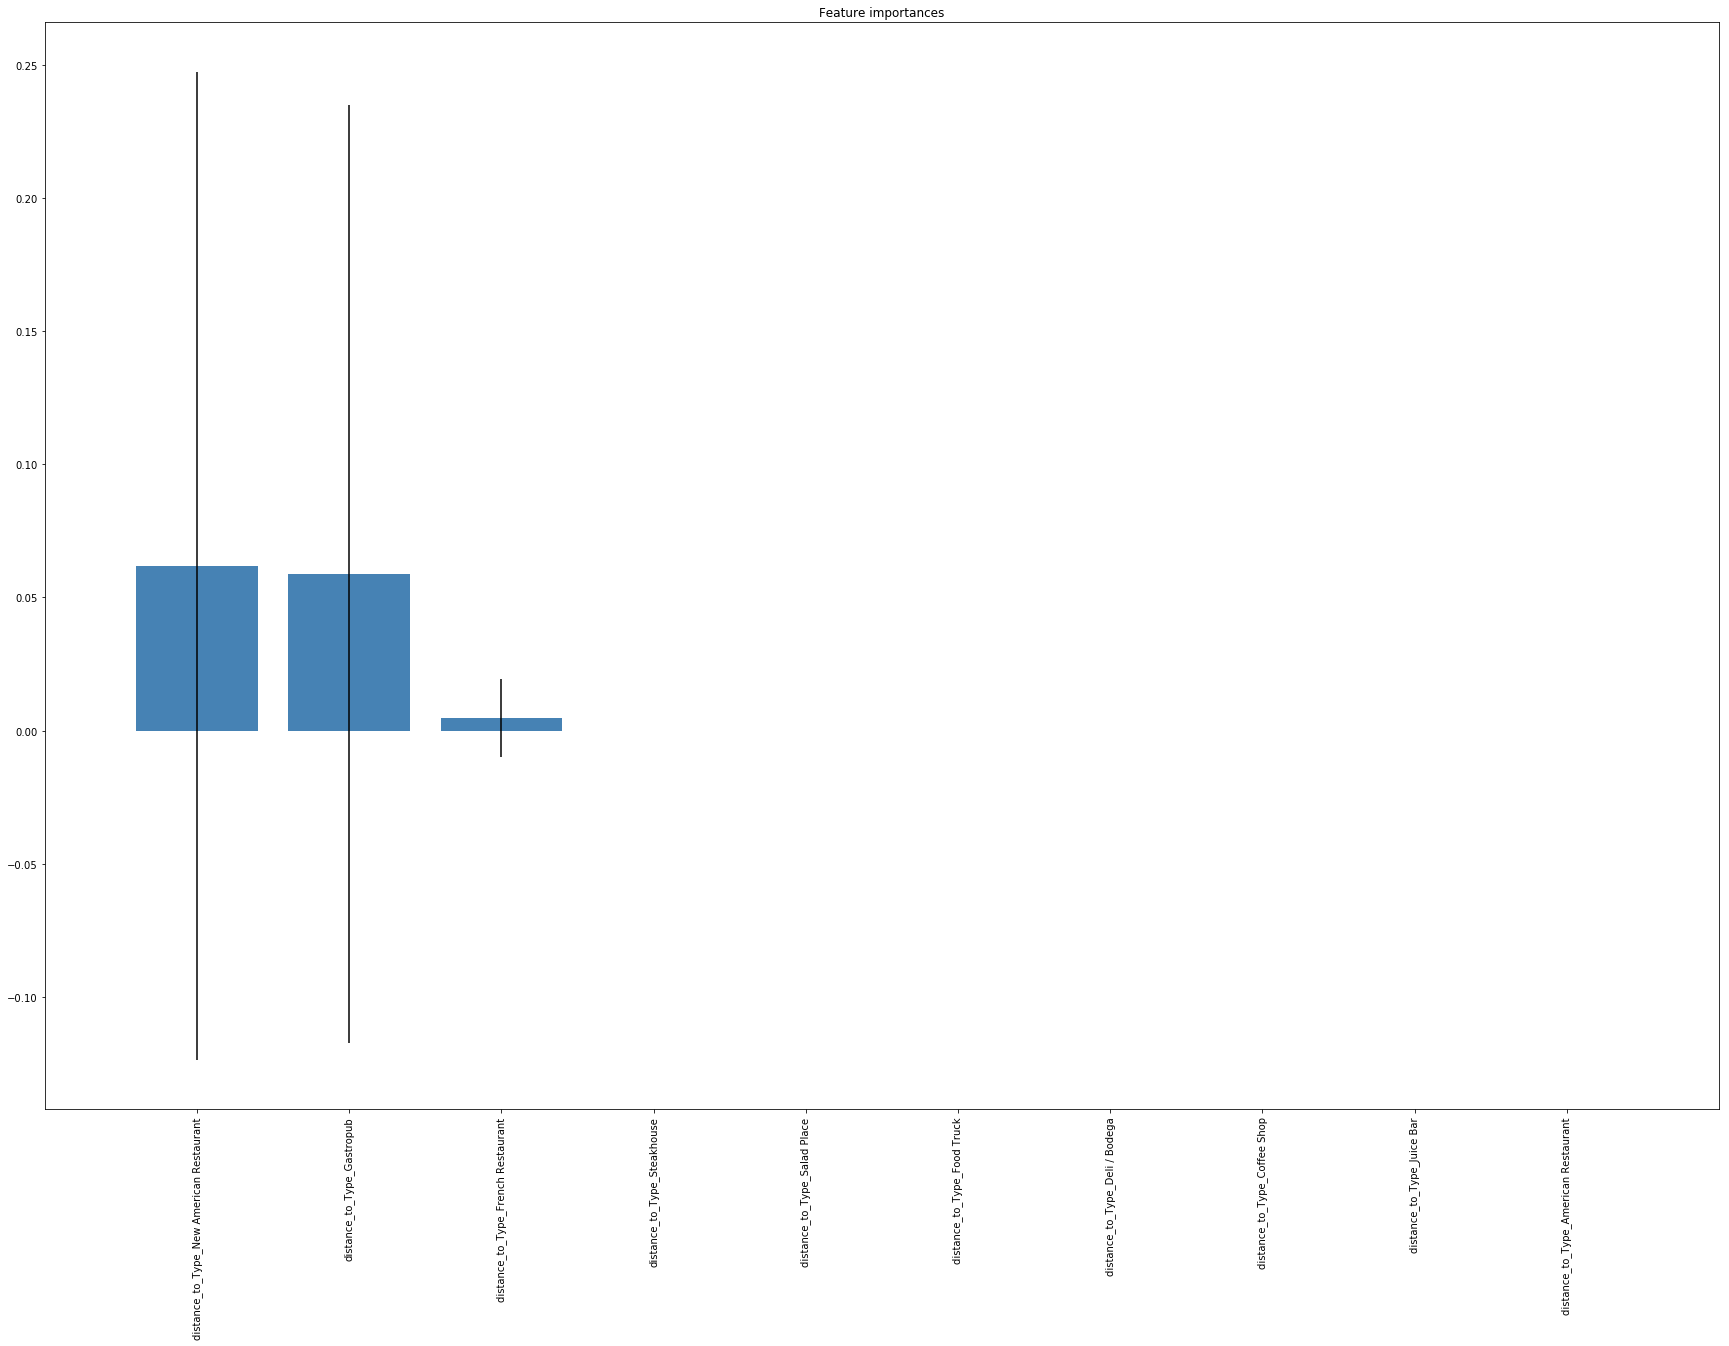

{'minmaxed': {'DT': 0.78764478764478763,
  'Logit': 0.45421245421245415,
  'RF': 0.36363636363636365},
 'original': {'DT': 0.78764478764478763,
  'Logit': 0.092715231788079458,
  'RF': 0.14666666666666667},
 'scaled': {'DT': 0.78764478764478763,
  'Logit': 0.44108761329305135,
  'RF': 0.44808743169398901}}

In [136]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rs=gr.fit(X_train[m],y_train[m])
    print (rs.best_params_)
    print(gr.score(X_test[m],y_test[m]))
    OS = []
    print("i am here")
    for c in range(5):
        rf=RandomForestClassifier()
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    print(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    featureImportancePlot(rf, X_foursquare.columns)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores


#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [137]:
from sklearn.model_selection import GridSearchCV

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
    resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
model

0.852713178295
0.852713178295
0.856035437431
0.856035437431
0.852713178295
0.852713178295


{'minmaxed': {'DT': 0.93909191583610185,
  'Logit': 0.83499446290143964,
  'RF': 0.86998892580287934,
  'SVM': 0.8527131782945736},
 'original': {'DT': 0.93909191583610185,
  'Logit': 0.84828349944629011,
  'RF': 0.87065337763012196,
  'SVM': 0.8527131782945736},
 'scaled': {'DT': 0.93909191583610185,
  'Logit': 0.7951273532668881,
  'RF': 0.87818383167220371,
  'SVM': 0.85603543743078625}}

In [138]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model[m][i])
    print('-----------------------------------------------------')

original
Logit
0.848283499446
DT
0.939091915836
RF
0.87065337763
SVM
0.852713178295
-----------------------------------------------------
scaled
Logit
0.795127353267
DT
0.939091915836
RF
0.878183831672
SVM
0.856035437431
-----------------------------------------------------
minmaxed
Logit
0.834994462901
DT
0.939091915836
RF
0.869988925803
SVM
0.852713178295
-----------------------------------------------------


In [145]:

for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_f1_scores[m][i])
    print('-----------------------------------------------------')
    print(model_f1_scores[m].keys(), model_f1_scores[m].values())
model_f1_scores.keys(), model_f1_scores.values()
pd.DataFrame(model_f1_scores)

original
Logit
0.0927152317881
DT
0.787644787645
RF
0.146666666667
SVM
0.324022346369
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.14666666666666667, 0.32402234636871508, 0.78764478764478763, 0.092715231788079458])
scaled
Logit
0.441087613293
DT
0.787644787645
RF
0.448087431694
SVM
0.198675496689
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.44808743169398901, 0.19867549668874168, 0.78764478764478763, 0.44108761329305135])
minmaxed
Logit
0.454212454212
DT
0.787644787645
RF
0.363636363636
SVM
0.363636363636
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.36363636363636365, 0.36363636363636365, 0.78764478764478763, 0.45421245421245415])


,minmaxed,original,scaled
DT,0.787645,0.787645,0.787645
Logit,0.454212,0.092715,0.441088
RF,0.363636,0.146667,0.448087
SVM,0.363636,0.324022,0.198675


In [140]:

for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_recall_scores[m][i])
    print('-----------------------------------------------------')
    print(model_recall_scores[m].keys(), model_recall_scores[m].values())
model_recall_scores.keys(), model_recall_scores.values()


original
Logit
0.0526315789474
DT
0.766917293233
RF
0.0827067669173
SVM
0.218045112782
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.082706766917293228, 0.21804511278195488, 0.76691729323308266, 0.052631578947368418])
scaled
Logit
0.548872180451
DT
0.766917293233
RF
0.308270676692
SVM
0.112781954887
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.30827067669172931, 0.11278195488721804, 0.76691729323308266, 0.54887218045112784])
minmaxed
Logit
0.466165413534
DT
0.766917293233
RF
0.240601503759
SVM
0.240601503759
-----------------------------------------------------
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.24060150375939848, 0.24060150375939848, 0.76691729323308266, 0.46616541353383456])


(dict_keys(['original', 'minmaxed', 'scaled']),
 dict_values([{'RF': 0.082706766917293228, 'SVM': 0.21804511278195488, 'DT': 0.76691729323308266, 'Logit': 0.052631578947368418}, {'RF': 0.24060150375939848, 'SVM': 0.24060150375939848, 'DT': 0.76691729323308266, 'Logit': 0.46616541353383456}, {'RF': 0.30827067669172931, 'SVM': 0.11278195488721804, 'DT': 0.76691729323308266, 'Logit': 0.54887218045112784}]))

In [141]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_precision_scores[m][i])
    print(model_precision_scores[m].keys(), model_precision_scores[m].values())
    print('-----------------------------------------------------')


original
Logit
0.388888888889
DT
0.809523809524
RF
0.647058823529
SVM
0.630434782609
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.6470588235294118, 0.63043478260869568, 0.80952380952380953, 0.3888888888888889])
-----------------------------------------------------
scaled
Logit
0.368686868687
DT
0.809523809524
RF
0.82
SVM
0.833333333333
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.81999999999999995, 0.83333333333333337, 0.80952380952380953, 0.36868686868686867])
-----------------------------------------------------
minmaxed
Logit
0.442857142857
DT
0.809523809524
RF
0.744186046512
SVM
0.744186046512
dict_keys(['RF', 'SVM', 'DT', 'Logit']) dict_values([0.7441860465116279, 0.7441860465116279, 0.80952380952380953, 0.44285714285714284])
-----------------------------------------------------


- You can refer to https://github.com/mv1742/updny_2

## Results Analysis

In [142]:
print(m)
resultset.columns

minmaxed


Index(['GEOID', 'pct_ch_hinc00_16', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'geometry', 'predicttyp', 'predicttyp2', 'actualtyp',
       'original_RF_predicttyp', 'scaled_RF_predicttyp',
       'minmaxed_RF_predicttyp', 'original_SVM_predicttyp',
       'scaled_SVM_predicttyp', 'minmaxed_SVM_predicttyp'],
      dtype='object', length=722)

The plots below show the number of positive (gentrifying, 1) and negative (not-gentrifying, 0) typologies based on the actual typology labels and the predicted labels from each model.

False    2569
True      440
Name: actualtyp, dtype: int64

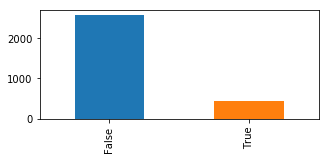

In [143]:
resultset['actualtyp'].value_counts().plot(kind='bar', figsize=(5,2))
resultset['actualtyp'].value_counts()

In [144]:
for m in models:
    for i in modelslist:
        resultset[m+'_'+i+'_predicttyp'].value_counts().plot(kind='bar',figsize=(5,2))
        plt.show()
        print(resultset[m+'_'+i+'_predicttyp'].value_counts())

KeyError: 'original_Logit_predicttyp'

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(resultset.actualtyp, resultset.original_RF_predicttyp)

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

Below you can see that logit produces 30 positive results (19 true and 11 false), while random forest produces only 1 positive (it is true).

In [ ]:
perf_measure(resultset.actualtyp, resultset.original_DT_predicttyp)

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

In [ ]:
resultsfull=data_sjoined_sum_merged.merge(resultset[["scaled_Logit_predicttyp"]], right_index=True, left_index=True)

In [ ]:
resultsfull.head()

In [ ]:
def set_resulttyp(row):
    if row["actualtyp"] == 0:
        if row["scaled_Logit_predicttyp"] == 0:
            return "TN"
        elif row["scaled_Logit_predicttyp"] == 1: 
            return "FP" 
    elif row["actualtyp"] == 1:
        if row["scaled_Logit_predicttyp"] == 1:
            return "TP"
        elif  row["scaled_Logit_predicttyp"] == 0:
            return "FN"

#df = df.assign(color=df.apply(set_color, axis=1))

In [ ]:
resultsfinal=resultsfull.assign(logitresulttyp=resultset.apply(set_resulttyp, axis=1))

In [ ]:
f, ax = plt.subplots(figsize=(16,16))
resultsfinal.plot(column='logitresulttyp', ax=ax, legend=True)

The only positive results for the logit model (whether true or false positive) fell in the NYC and Jersey City areas-- no outer borough or other NJ/CT/NY tracts were picked up. 